# UDACITY NANODEGREE - DATA ANALYST

## Samuel Elegure

## P2: Exploratory Data Analysis of Titanic

#### Questions: 
1. What factors best predict the passengers' survival or otherwise
2. How does Male and Female Passenger compare?
3. What is the statistical summary of the continuous variables?
4. What insights can be gained from the categorical variables?
5. What hidden pattern or variables can be used to gain further insight about the titanic data?

#### Approach
1. Correlation between Survived & other variables.
2. Visualization of variables in charts.
3. Subclassifying or extracting variables for better comparison or understanding
4. Hypothesis Testing

# 1.1 Load Data and Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('titanic_train.csv')
print ('The total number of passegers in this titanic train data set is', len(train))

The total number of passegers in this titanic train data set is 891


# 1.2 Viewing the dataset to gain insight

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1.3 Defining Variables

In [5]:
sex = train['Sex']
survived = train['Survived']
age = train['Age']
siblings_spouse = train['SibSp']
fare = train['Fare']
pclass = train['Pclass']
embarked = train['Embarked']
name = train['Name']
parent_child = train['Parch']

# 2.0 FEATURE ENGINEERING

# 2.1 Missing Values

The summary of data shows that we have some missing values in Age. Replacing the missing Age values with the mean

In [6]:
train= train.fillna(train.mean())

# 2.2 Extracting Survivors from the train data set

In [7]:
survivors_train=train[train.Survived==1]
print ('The number of passegers that survived in the train data is',len(survivors_train))

The number of passegers that survived in the train data is 342


# 2.2.1 Survived Passengers Satatistical Summary

In [8]:
survivors_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.549778,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,13.772498,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,21.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,29.699118,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


The above statistical summary shows that the Mean age of survivors is 28 while the median age is 29
The minimum age is 0.4 years while the maximum age is 80
The Minimum and Maximum fare paid by survivors is 0 and 512 British Pounds respectively. 

# 2.3 Extracting Perished Passengers

In [9]:
perished_train=train[train.Survived==0]
print ('The number of passegers that perished is', len(perished_train))

The number of passegers that perished is 549


## 2.3.1 Perished Passengers Satatistical Summary

In [10]:
perished_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.415100,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,12.457370,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,23.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,29.699118,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,35.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


The above statistical summary shows that the Mean age of passsengers that perished is 30
While survivors mean age is 28. This signifies that more younger people survived than perished.
The median age is 29 (same as median age of survivors)
The minimum age is 1 year while the maximum age is 74
The Minimum and Maximum fare paid by survivors is 0 and 263 British Pounds respectively.

# 3.0 Data Exploration

# 3.1 Exploring Age Distribution

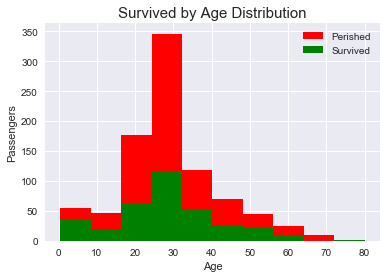

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(train['Age'], color='r', label = 'Perished')
plt.hist(survivors_train['Age'], color = 'g', label = 'Survived')
plt.xlabel("Age")
plt.ylabel("Passengers")
plt.title("Survived by Age Distribution", fontsize=15)
plt.legend()

Plotting Age distribution of Survived passengers in proportion to total passengers. 
The above graph shows that the distribution of survived passengers followed the same pattern with 
the total age distribution of the passengers. However, we could see that the proportion of survived
passengers varies with the age bin. More casualty were recorded around the centre of tendency of 30

# 3.2 Exploring Passenger Class

The Passenger Class is categorized into 1st class, 2nd class and 3rd class.
The 1st class is the class for passengers that paid the highest fares,
followed by the 2nd class and lastly the 3rd class. The focus here is to explore 
the passenger class to detect patterns.

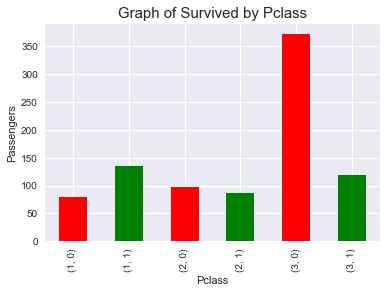

In [32]:
survived_pclass = train.groupby(['Pclass', 'Survived',]).count()['PassengerId']
survived_pclass.plot(kind='bar', color = ['r','g','r','g','r','g'])
plt.xlabel("Pclass")
plt.ylabel("Passengers")
plt.title("Graph of Survived by Pclass", fontsize=15)

Red signifies number of passengers that perished while Green means number survived. The plot above shows that passengers in 1st class have a higher chance of surviving the wreckage
About two-third of the passengers in the 1st class survived, passengers in 2nd class has about 45%
chance of surviving, while passengers in the 3rd class only have about 30% chance of surviving.

## 3.2.1 Hpothesis Testing of Survived and Passenger Class

##### Tabulating Pclass for Hypothesis Test

In [17]:
obs_class=pd.crosstab(survived, pclass)
obs_class

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


## 3.2.2 Chi Square Test of Survived and Pclass

In [18]:
from scipy.stats import chisquare
chisquare(obs_class, axis=None, ddof=2)

Power_divergenceResult(statistic=418.2188552188552, pvalue=2.5038371592596995e-90)

The χ2 Statistic of 418.2 is greater the Critical value of 9.488. And the P-value is less than 0.05. 
Hence we reject the hypothesis because we have obtained evidence that there is an association 
between Class of the passengers and survival of the titanic ship wreck.

# 3.3 Exploring Fare

The focus here is to see if there is any preference given to people who paid higher fare
in terms of survivors. We might expect this to support the discovery made on the passenger 
class which shows that passengers in 1st class has higher chances of surviving compared to 
2nd and 3rd class.

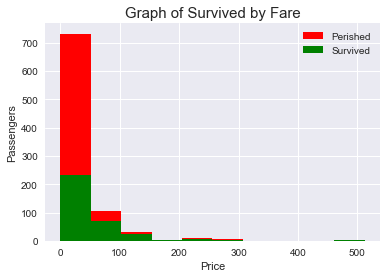

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(fare, facecolor='r', label = 'Perished')
plt.hist(survivors_train['Fare'], color = 'g', label = 'Survived')
plt.xlabel("Price")
plt.ylabel("Passengers")
plt.title("Graph of Survived by Fare", fontsize=15)
plt.legend()

The above graph shows that only a third of the passengers who paid between 0 to 50 dollars survived the titanic wreckage. 
The chances of survival kept increasing as the price of the tickets increases. About 60% to 70% of passengers who paid
between 50 to 100 dollars survived as well. Passengers who paid the highest fare of $512 survived.

## 3.3.1 Checking details of passengers that paid above 263 GBP

In [20]:
train[train.Fare>263]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


We could see that only three passengers paid above 263GBP and they all survived the wreckage.

## 3.3.2 Exploring 1st class & fare

In [21]:
pclass1 = train[train.Pclass==1]
pclass1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,216.000000,216.000000,216.0,216.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,37.048118,0.416667,0.356481,84.154687
std,246.737616,0.484026,0.0,14.046369,0.611898,0.693997,78.380373
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,29.000000,0.000000,0.000000,30.923950
50%,472.000000,1.000000,1.0,35.000000,0.000000,0.000000,60.287500
75%,670.500000,1.000000,1.0,47.250000,1.000000,0.000000,93.500000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


Above summary shows that we have passengers who actually didn't pay but are in first class.
I am a little curious in knowing if majority of this category survived as well

### 3.3.2.1 PClass 1 Passengers Who Did Not Pay For The Trip

In [22]:
pclass1[pclass1.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,29.699118,0,0,112058,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,19972,0.0,NaN,S


None of the passengers who paid zero fare survived even though they where in the 1st class.
Reading into their biographies, they are employees of H&W, the company that built Titanic

##### Visualization of 1st class distribution

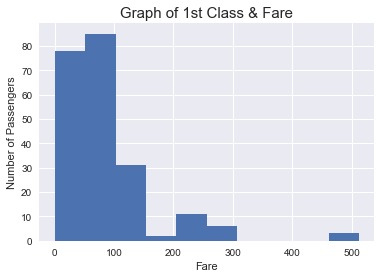

In [23]:
%matplotlib inline
plt.hist(pclass1.Fare)
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Graph of 1st Class & Fare", fontsize=15)

The Mean fare price for the 1st class is 86 GBP, since we have an outlier of 512 GBP fare 
The mean can be said not to be accurate. The median fare is 61 GBP and the bin for the 
mode is between 51 to 100 GBP

## 3.3.3 Exploring 2nd class & fare

In [24]:
pclass2 = train[train.Pclass==2]
pclass2[pclass2.Fare>0].describe() ###excluded passengers who paid zero fares

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,178.000000,178.000000,178.0,178.000000,178.000000,178.000000,178.000000
mean,443.859551,0.488764,2.0,29.872616,0.415730,0.393258,21.358661
std,253.216545,0.501284,0.0,13.801937,0.607095,0.698958,13.083169
min,10.000000,0.000000,2.0,0.670000,0.000000,0.000000,10.500000
25%,230.000000,0.000000,2.0,23.000000,0.000000,0.000000,13.000000
50%,430.500000,0.000000,2.0,29.699118,0.000000,0.000000,15.022900
75%,666.750000,1.000000,2.0,36.000000,1.000000,1.000000,26.000000
max,887.000000,1.000000,2.0,70.000000,3.000000,3.000000,73.500000


##### Visualization of 2nd class distribution

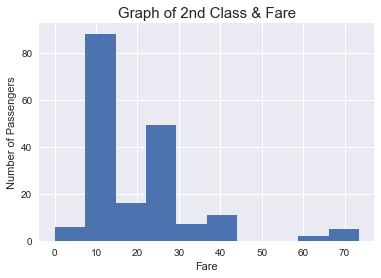

In [25]:
%matplotlib inline
plt.hist(pclass2.Fare)
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Graph of 2nd Class & Fare", fontsize=15)

The above graph shows that passengers that paid above 50 GBP for the 2nd class are outliers
The graph also show that the 2nd class fare is about 10 GBP. The Mean is 21 GBP 
while the median is 15 GBP. In this case, Median will be better measure of center.

## 3.3.4 Exploring 3rd class & fare

In [26]:
pclass3 = train[train.Pclass==3]
pclass3[pclass3.Fare>0].describe() ###excluded passengers who paid zero fares

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,487.000000,487.000000,487.0,487.000000,487.000000,487.000000,487.000000
mean,439.983573,0.242300,3.0,26.355236,0.620123,0.396304,13.787875
std,264.987545,0.428915,0.0,10.796896,1.379392,0.891793,11.760718
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,4.012500
25%,200.000000,0.000000,3.0,20.250000,0.000000,0.000000,7.750000
50%,434.000000,0.000000,3.0,29.699118,0.000000,0.000000,8.050000
75%,668.500000,0.000000,3.0,29.699118,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


##### Visualization of 3rd class distribution

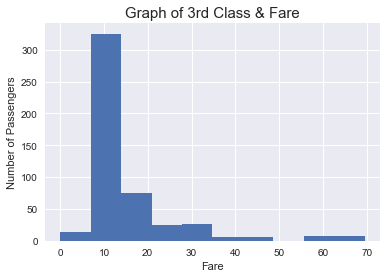

In [27]:
%matplotlib inline
plt.hist(pclass3.Fare)
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Graph of 3rd Class & Fare", fontsize=15)

The center of the distribution for the 3rd class using the mode as seen in the graph can be said to be the 10 GBP. The Pclass 3 has the highest number of passengers.

## 3.4 Exploring Gender

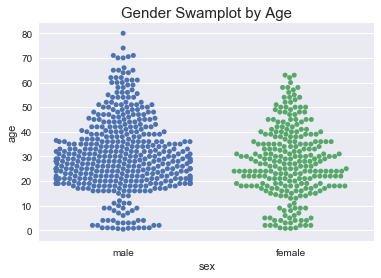

In [28]:
sns.swarmplot(x=sex, y=age, data=train)
plt.xlabel('sex')
plt.ylabel('age')
plt.title("Gender Swamplot by Age", fontsize=15)

The swamplot above shows the age distribution and number of male and female passenger on the Titanic ship. There are more male on the ship than female. We could also see that the oldest female on board was a little above 60 years

## 3.4.1 Grouping by Gender

In [29]:
survived_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
survived_sex

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

## 3.4.2 Plotting the graph

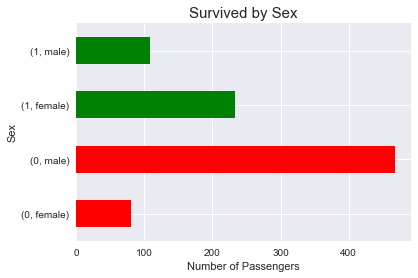

In [30]:
survived_sex.plot(kind='barh', color = ['r','r','g','g'])
plt.xlabel("Number of Passengers")
plt.ylabel("Sex")
plt.title("Survived by Sex", fontsize=15)

The graph above shows the fact that female passengers on board of titanic were given preferential consideration
as regards who should get on the life boats or not. Less than 20% of the male passengers survived while about
74% of the female passengers survived. There is a need to subclassify the passengers into adult, children, married etc
Hence, exploring title and age for further classification.

## 3.4.3 Hypothesis Testing of Gender and Survived

## 3.4.4 Chisquare Test of Gender and Survived

In [31]:
from scipy.stats import chisquare
obs_sex=pd.crosstab(survived, train['Sex'])
chisquare(obs_sex, axis=None, ddof=1)

Power_divergenceResult(statistic=418.7867564534231, pvalue=1.1524213328712265e-91)

The χ2 Statistic of 418.8 is greater than the Critical value of 9.488. And the P-value is less than 0.05.
We reject the hypothesis because we have obtained evidence that the survival of each passenger is not 
independent of the sex of the passenger.

# 3. 5 Exploring Name (Title)

In [32]:
name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

## 3.5.1 Creating functions to split the name by delimiter '.'

In [33]:
def name_title(data):
    name_split =data.split(".")
    firstname_title = name_split[0]
    #title = name_split[1]
    #lastname = name_split[2]
    #return lastname, firstname
    return firstname_title

def extract_title(df):
    return df.apply(name_title)

In [34]:
firstname_title=extract_title(name)
firstname_title.head()

0         Braund, Mr
1       Cumings, Mrs
2    Heikkinen, Miss
3      Futrelle, Mrs
4          Allen, Mr
Name: Name, dtype: object

## 3.5.2 Creating function to split the firstname_title

In [35]:
def name_title2(data):
    name_split =data.split(" ")
    firstname_title = name_split[0]
    title = name_split[-1]
    return title

def extract_title2(df):
    return df.apply(name_title2)

title = extract_title2(firstname_title)

In [36]:
title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

## 3.5.3 Reclassifying titles to Mr, Mrs, Master, Miss and Ms

In [37]:
for n,i in enumerate(title):
    if i=='Sir':
        title[n]='Mr'
    if i=='Mlle':
        title[n]='Miss'
    if i=='Capt':
        title[n]='Mr'
    if i=='Mme':
        title[n]='Mrs'
    if i=='Don':
        title[n]='Mr'
    if i=='Col':
        title[n]='Mr'
    if i=='Jonkheer':
        title[n]='Mr'
    if i=='Major':
        title[n]='Mr'
    if i=='Countess':
        title[n]='Mrs'
    if i=='Lady':
        title[n]='Miss'
    if i=='Dr':
        title[n]='Mr'
    if i=='Rev':
        title[n]='Mr'

###### Creating the title column in the train data set

In [38]:
train['Title']= title

##### Reviewing the title 'Dr.' for correct gender classification

In [39]:
#Index 796 is a female Dr.
train.iloc[796, 12]='Mrs'
train.iloc[796, 12]

'Mrs'

##### Assigning Ms title to female above the age of 15 and master title to Mr below the age of 15

In [54]:
for n,i in enumerate(train.Title):
    if i=='Miss'\
        and train.Age[n] > 15:
        train.Title[n]='Ms'
    if i=='Mr'\
        and train.Age[n] <= 15:
        train.Title[n]='Master'

## 3.5.4 Swamplot of title and age distribution

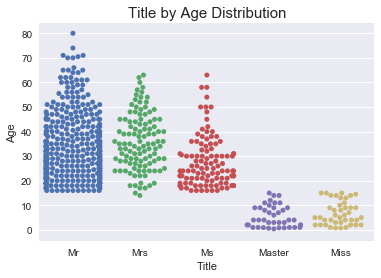

In [41]:
sns.swarmplot(x=train.Title, y=age, data=train)
plt.xlabel('Title')
plt.ylabel('Age')
plt.title('Title by Age Distribution', fontsize=15)
plt.show()

The swamplot above shows the five categories of title after cleaninng and reclassification.

## 3.5.5 Graph of Survivors by Title

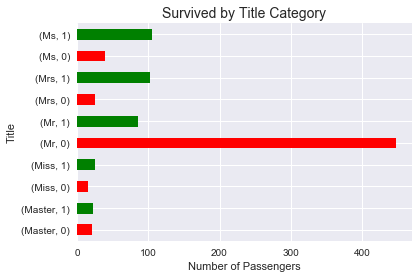

In [42]:
survived_title = train.groupby(['Title', 'Survived']).count()['PassengerId']
survived_title.plot(kind='barh', color = ['r','g','r','g','r','g','r','g','r','g','r','r'])
plt.xlabel("Number of Passengers")
plt.ylabel("Title")
plt.title("Survived by Title Category", fontsize=14)

The above graph shows that Married women has the highest chance of surviving the titanic wreckage, 
A female child has a higher chance of surviving compared to male child.
Adult male has the least chance of surviving the wreckage.

## 3.5.6 Hypothesis Testing of Survived by Title

In [43]:
obs=pd.crosstab(survived, train['Title'])
obs

Title,Master,Miss,Mr,Mrs,Ms
Survived,,,,,
0,21,15,447,26,40
1,23,26,86,102,105


## 3.5.7 Chisquare Test of Survived by Title

In [44]:
from scipy.stats import chisquare
chisquare(obs, axis=None, ddof=4)

Power_divergenceResult(statistic=1721.581369248036, pvalue=0.0)

The Chi square Statistic value is greater the Critical value of 9.488. And the P-value is less than 0.05. Hence we reject the hypothesis because we have obtained evidence that there is an association between title of the passengers and survival of the titanic ship wreck.

# 3.6 Exploring Family 

In [45]:
family_member = siblings_spouse + parent_child
train['Family']= family_member

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


## 3.6.1 Plotting the Graph

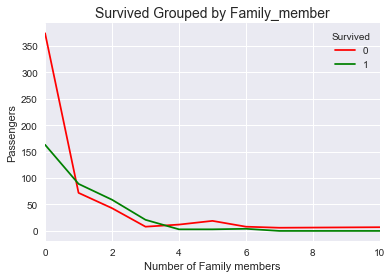

In [46]:
pd.crosstab(train['Family'], survived).plot(color = ['r', 'g'])
plt.title("Survived Grouped by Family_member", fontsize=14)
plt.xlabel("Number of Family members")
plt.ylabel("Passengers")

The above graph shows that passengers with one to three family members has a higher chance of surviving 
than passengers no family member or with more than three family members on board.

## 3.6.2 Hypothesis Testing of Survived by Family

## 3.6.3 Chisquare Test of Survived by Family

In [47]:
obs_fam = pd.crosstab(survived, train['Family'])
obs_fam

Family,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [48]:
from scipy.stats import chisquare
chisquare(obs_fam, axis=None, ddof=8)

Power_divergenceResult(statistic=2868.0505050505049, pvalue=0.0)

The χ2 Statistic of 2868 is greater than the Critical value of 9.488. And the P-value is less than 0.05.
We reject the hypothesis because we have obtained evidence that the survival of passengers has an association 
with the presence of a family member on board of the titanic ship.

# 4.0  Correlation

In [49]:
def correlation(x, y):
    std_x = (x-x.mean())/(x.std(ddof=0))
    std_y = (y-y.mean())/(y.std(ddof=0))
    std_xy = std_x * std_y
    
    correlation = std_xy.mean()
    
    return correlation

## 4.1 Correlation Survived & Age

In [50]:
print ('Correlation between survived and age is', correlation(survived, age))

Correlation between survived and age is -0.077982678413863


The above results means there is a negative correlation between Surviving the Titanic and the Age of each passenger. The correlation of -0.08 though not significant means that the chances of survival decreases as Age of the passenger increases. However, correlation does not always means causal.

## 4.2 Correlation Survived & Pclass

In [51]:
print ('Correlation between survived and pclass is',correlation(survived, pclass))

Correlation between survived and pclass is -0.33848103596101325


The negative correlation of 0.34 means as the class of the passenger goes lower, 
the chances of survival decreases. i.e as a passenger class moves from Pclass 1,
which can be classified as upper class to Pclass classified as lower class. 
The likelihood of survival decreases.

## 4.3 Correlation Survived & Family

In [52]:
print ('Correlation between survived and family_member is', correlation(survived, family_member))

Correlation between survived and family_member is 0.01663898928274518


There is a positive correlation of 0.02 between survived and the presence of a family member on board the Titanic
Though this is very small, it means as the number of family member increases, there is likelihood that the chances of survival increases as well.

## 4.4 Correlation Survived & Fare

In [53]:
print ('Correlation between survived and fare is', correlation(survived, fare))

Correlation between survived and fare is 0.2573065223849616


A positive correlation of 0.28 between survived and fare price paid by passengers. The correlation shows that the higher the fare ticket paid the higher the likelihood of surviving the wreckage.

# 5.0 Conclusion

Based on the analyses above, the likelihood of survival of a passenger can be predicted based on 
the gender, title, class, fare, family member, age. Though none of the factors can independently 
predict the likelihood of the survival, a combination of three or more of the variables might give 
a better prediction.

<ls> A female child has a higher chance of surviving compared to male child.
<ls> Adult male has the least chance of surviving the wreckage, the likelihood is about 1 to every 6 men.
<ls> Passengers in 1st class have a higher chance of surviving the wreckage than 2nd and 3rd class
<ls> The lower fare ticket paid by passenger the lower the chances of survival.
<ls> Passengers with one to three family members has a higher chance of surviving than passengers none or more
<ls> Married women has the highest chance of surviving the titanic wreckage, 



# 5.1 Limitations of Dataset

<ls> There could be some other factors or characteristics of the passengers not recorded or captured. 
<ls> The basis of the selection of the train data set is unknown. Is it representative of the entire 
population on board of the Titanic. 
<ls> There are some missing values or characteristics of the passengers not captured. e.g Age, Embarked, Cabin etc which limits possible robust analysis
<ls> Limitation on actual facts of what happened?
<ls> Correlation does not necessarily mean causation.

# 5.2 Future Possible Research

Further studies can carried out in analysing the following;
<ls> What made some passengers in first class perished and what made some passengers in 3rd class survived
<ls> Did most passengers in 3rd class got cought up with the burst of the water before they could get to the life boats. 
<ls> Did some passenger voluntarily decided not survive even with the oppotunity to survive. 


# Reference

http://seaborn.pydata.org/tutorial/categorical.html

http://seaborn.pydata.org/tutorial/distributions.html

https://www.encyclopedia-titanica.org/

http://www.awesomestats.in/python-pandas-titanic/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html